In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import astropy 
%matplotlib inline

In [2]:
search_ffi = lk.search_tesscut('TIC 182582608 ')
search_tpf = lk.search_targetpixelfile('TIC 182582608 ')
search_lcf = lk.search_lightcurve('TIC 182582608 ')

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 07,2019,TESScut,1426,TIC 182582608,0.0
1,TESS Sector 08,2019,TESScut,1426,TIC 182582608,0.0
2,TESS Sector 34,2021,TESScut,475,TIC 182582608,0.0
3,TESS Sector 35,2021,TESScut,475,TIC 182582608,0.0


In [4]:
search_result_s8 = lk.search_tesscut('TIC 182582608', sector=8)
cut_s8 = search_result_s8.download(cutout_size=10)
print(cut_s8)

TessTargetPixelFile(TICID: TIC 182582608)


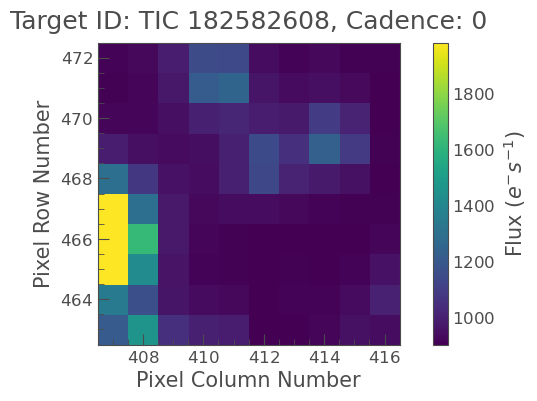

In [5]:
cut_s8.plot();

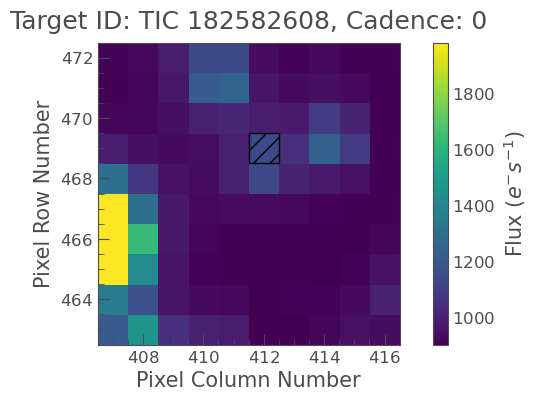

In [6]:
s8_target_mask = cut_s8.create_threshold_mask(threshold=4, reference_pixel='center')
s8_n_target_pixels = s8_target_mask.sum()
s8_n_target_pixels
cut_s8.plot(aperture_mask=s8_target_mask, mask_color='k');

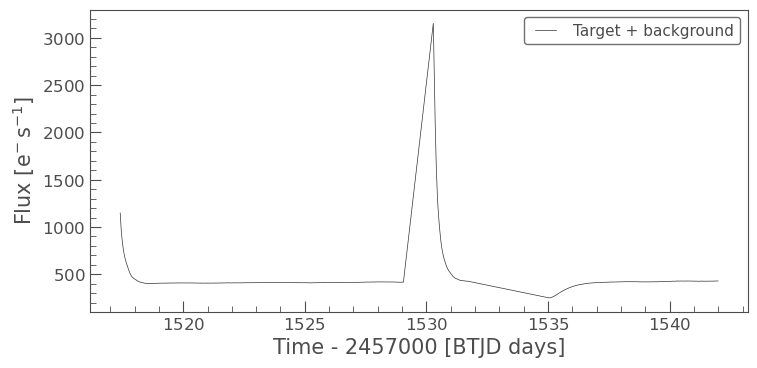

In [7]:
s8_target_lc = cut_s8.to_lightcurve(aperture_mask=s8_target_mask)
s8_target_lc.plot(label='Target + background');

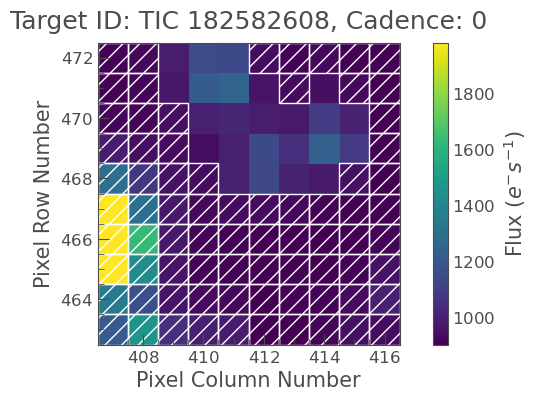

In [23]:
s8_background_mask = ~cut_s8.create_threshold_mask(threshold=0.003, reference_pixel= 'center')
cut_s8.plot(aperture_mask=s8_background_mask, mask_color='w');

In [24]:
s8_n_background_pixels = s8_background_mask.sum()
s8_n_background_pixels

76

In [25]:
s8_background_lc_per_pixel = cut_s8.to_lightcurve(aperture_mask=s8_background_mask) / s8_n_background_pixels

In [26]:
s8_background_estimate_lc = s8_background_lc_per_pixel * s8_n_target_pixels

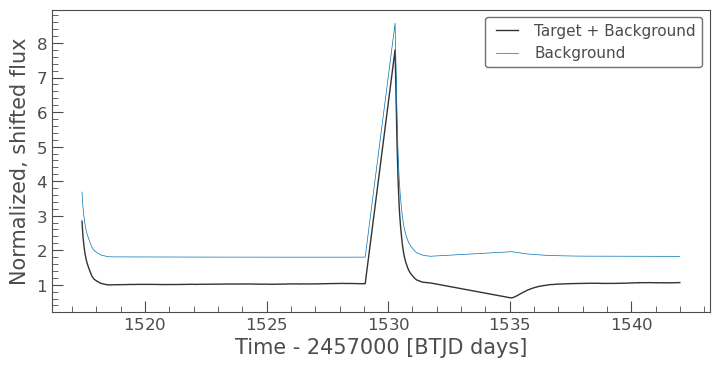

In [27]:
common_normalization = np.nanpercentile(s8_target_lc.flux, 10)
ax = (s8_target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(s8_background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux');